<a href="https://colab.research.google.com/github/alsam123/Sentiment-analysis/blob/main/Twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import random
import statistics
from collections import Counter
from nltk.corpus import movie_reviews
from nltk.classify import ClassifierI
from statistics import mode
from scipy import stats as s
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC,LinearSVC,NuSVC
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
class VoteClassifier(ClassifierI):
  def __init__(self,*classifiers):
    self.classifiers=classifiers

  def classify(self,features):
    votes=[]
    for c in self.classifiers:
      v=c.classify(features)
      votes.append(v)
    return max([p[0] for p in statistics._counts(votes)])
   
    #return mode(votes)
  def confidence(self,features):
    votes=[]
    for c in self.classifiers:
      v=c.classify(features)
      votes.append(v)
    choice_votes = votes.count(max([q[0] for q in statistics._counts(votes)]))
    conf = choice_votes / len(votes)
    return conf

In [ ]:
positive = open("/content/positive.txt","r",encoding='latin-1').read()
negative = open("/content/negative.txt","r",encoding='latin-1').read()


In [ ]:
documents = []
allowed_words = ["J"]
all_words=[]

for p in positive.split("\n"):
  documents.append((p,"pos"))
  pos_words = word_tokenize(p)
  pos = nltk.pos_tag(pos_words)
  for w in pos:
    if(w[1][0] in allowed_words):
      all_words.append(w[0].lower())

for p in negative.split("\n"):
  documents.append((p,"neg"))
  neg_words = word_tokenize(p)
  neg = nltk.pos_tag(neg_words)
  for w in neg:
    if(w[1][0] in allowed_words):
      all_words.append(w[0].lower())


print(pos_words[0:5])

all_words = nltk.FreqDist(all_words)
print(len(all_words))

[]
6182


In [ ]:
word_features = list(all_words.keys())[:5000]
def find_features(document):
  words = word_tokenize(document)
  words = set(words)
  features = {}
  for w in word_features:
    if(w in words):
      features[w]=True
    else:
      features[w]=False
  return features
featuresets = []
for (rev,category) in documents:
  featuresets.append((find_features(rev),category))
random.shuffle(featuresets)
print(featuresets[0])

({'21st': False, 'new': False, 'conan': False, 'greater': False, 'jean-claud': False, 'steven': False, 'elaborate': False, 'huge': False, 'expanded': False, 'effective': False, 'too-tepid': False, 'good': False, 'rare': False, 'honest': False, 'great': False, 'neurotic': False, 'absolute': False, 'snappy': False, 'clever': False, 'different': False, 'asian': False, 'low-key': False, 'genuine': False, 'greatest': False, 'family-oriented': False, 'fantasy-adventure': False, 'utterly': False, 'famous': False, 'talky': False, 'masterpiece': False, 'willing': False, 'inscrutable': False, 'fresh': False, 'true': False, 'thoughtful': False, 'provocative': False, 'top': False, 'independent': False, 'incisive': False, 'bleakly': False, 'evocative': False, 'hypnotic': False, 'nice': False, 'standard': False, 'few': False, 'dedicated': False, 'good-hearted': False, 'melodramatic': False, 'idealistic': False, 'latent': False, '15-year-old': False, 'brisk': False, 'familiar': False, 'earlier': Fals

In [ ]:
random.shuffle(featuresets)
training_set = featuresets[:10000]
test_set = featuresets[10000:]
poscount,negcount=0,0
for i in test_set:
  if(i[1]=="pos"):
    poscount+=1
  else:
    negcount+=1
print(poscount,negcount)

350 314


In [ ]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Naive Bayes Accuracy : ",(nltk.classify.accuracy(classifier,test_set))*100)

Naive Bayes Accuracy :  72.28915662650603


In [ ]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier Accuracy : ",(nltk.classify.accuracy(MNB_classifier,test_set))*100)

MNB_classifier Accuracy :  72.89156626506023


In [ ]:
BNB_classifier = SklearnClassifier(BernoulliNB())
BNB_classifier.train(training_set)
print("BNB_classifier Accuracy : ",(nltk.classify.accuracy(BNB_classifier,test_set))*100)

BNB_classifier Accuracy :  73.04216867469879


In [ ]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier Accuracy : ",(nltk.classify.accuracy(LogisticRegression_classifier,test_set))*100)

LogisticRegression_classifier Accuracy :  72.43975903614458


In [ ]:
SGD_Classifier = SklearnClassifier(SGDClassifier())
SGD_Classifier.train(training_set)
print("SGD_Classifier Accuracy : ",(nltk.classify.accuracy(SGD_Classifier,test_set))*100)

SGD_Classifier Accuracy :  71.3855421686747


In [ ]:
LinearSVC_Classifier = SklearnClassifier(LinearSVC())
LinearSVC_Classifier.train(training_set)
print("LinearSVC_Classifier Accuracy : ",(nltk.classify.accuracy(LinearSVC_Classifier,test_set))*100)

LinearSVC_Classifier Accuracy :  70.03012048192771


In [ ]:
voted_classifier = VoteClassifier(classifier,MNB_classifier,BNB_classifier,LogisticRegression_classifier,SGD_Classifier,LinearSVC_Classifier)
print("voted_classifier Accuracy : ",(nltk.classify.accuracy(voted_classifier,test_set))*100)

voted_classifier Accuracy :  73.49397590361446


In [ ]:
print("Classification : ",voted_classifier.classify(test_set[0][0]),"Confidence : ",voted_classifier.confidence(test_set[0][0])*100)
print("Classification : ",voted_classifier.classify(test_set[1][0]),"Confidence : ",voted_classifier.confidence(test_set[1][0])*100)
print("Classification : ",voted_classifier.classify(test_set[2][0]),"Confidence : ",voted_classifier.confidence(test_set[2][0])*100)
print("Classification : ",voted_classifier.classify(test_set[3][0]),"Confidence : ",voted_classifier.confidence(test_set[3][0])*100)

Classification :  neg Confidence :  100.0
Classification :  pos Confidence :  100.0
Classification :  neg Confidence :  100.0
Classification :  pos Confidence :  83.33333333333334


In [ ]:
import pickle
save_classifier = open("/content/NaiveBayesClassifier.pickle", "wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

In [ ]:
save_classifier = open("/content/BNB_classifier.pickle", "wb")
pickle.dump(BNB_classifier, save_classifier)
save_classifier.close()

In [ ]:
save_classifier = open("/content/LogisticRegression_classifier.pickle", "wb")
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()

In [ ]:
save_classifier = open("/content/SGD_Classifier.pickle", "wb")
pickle.dump(SGD_Classifier, save_classifier)
save_classifier.close()

In [ ]:
save_classifier = open("/content/LinearSVC_Classifier.pickle", "wb")
pickle.dump(LinearSVC_Classifier, save_classifier)
save_classifier.close()

In [ ]:
def sentiment(text):
    feats = find_features(text)

    return (voted_classifier.classify(feats),voted_classifier.confidence(feats))

In [ ]:
print(sentiment("This movie was awesome! The acting was great, plot was wonderful, and there were pythons...so yea!"))
print(sentiment("This movie was utter junk. There were absolutely 0 pythons. I don't see what the point was at all. Horrible movie, 0/10"))

('pos', 1.0)
('neg', 1.0)


In [ ]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json




#consumer key, consumer secret, access token, access secret.
ckey=""
csecret=""
atoken=""
asecret=""

class listener(StreamListener):

    def on_data(self, data):
        all_data = json.loads(data)

        tweet = all_data["text"]
        sent,conf = sentiment(tweet)[0],sentiment(tweet)[1]
        if(conf  > .8):
          output = open('/content/output.txt','a')
          output.write(sent)
          output.write("\n")
          output.close()


        return True

    def on_error(self, status):
        print(status)

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["happy"])


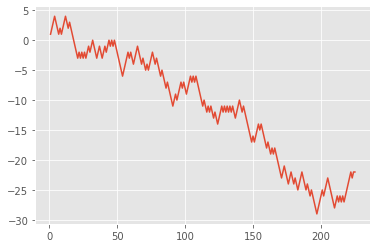

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('/content/output.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []

    x=0
    y=0
    for line in lines:
        x+=1
        if "pos" in line:
           y+=1
        elif("neg" in line):
           y-=1
        xs.append(x)
        ys.append(y)
    ax1.clear()
    ax1.plot(xs, ys)
ani = animation.FuncAnimation(fig,animate,interval=1000)
plt.show()